In [1]:
import pandas as pd
import numpy as np
import h5py
import os
import torch

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

In [5]:
transform = transforms.Compose([
    transforms.Resize((320, 258)),  # Resize images to 320x258
    transforms.ToTensor(),  # Convert images to tensor format
])

current_dir = os.getcwd()
dataset_path = os.path.join(current_dir, 'dataset', 'Frutas', 'Train')

# Load the dataset
trainset = ImageFolder(root=dataset_path, transform=transform)

# Create a DataLoader to batch the data
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Example of accessing an image and its label
image, label = trainset[0]
print(f'Image shape: {image.shape}, Label: {label}')

Image shape: torch.Size([3, 320, 258]), Label: 0


In [6]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import matplotlib.pyplot as plt

In [8]:
#Baches de 64 imágenes de 3 canales (RGB) de tamaño 320x258
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 3, 320, 258])
torch.Size([64])


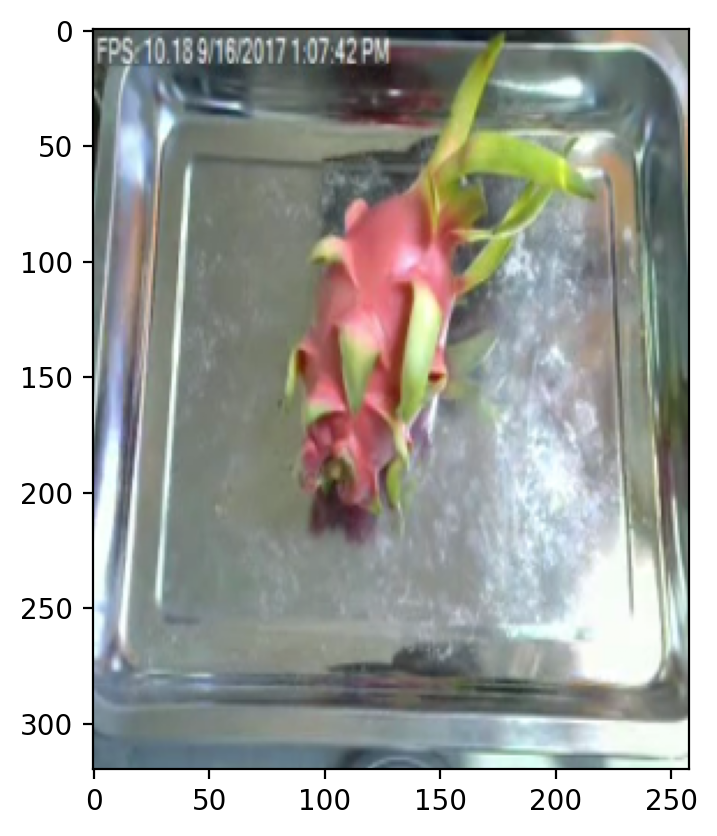

In [13]:
plt.imshow(images[2].numpy().transpose(1, 2, 0))  # Reordenamos los ejes para que sea interpretable por imshow
plt.show()

In [16]:
#Todas las instancias de 784 se reemplazan por 247680 (3x320x258)
def activation(x):
  return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(247680, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 5)
b2 = torch.randn(5)

h = activation(torch.mm(inputs, w1) + b1)

out = activation(torch.mm(h, w2) + b2)

In [18]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 5)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 5])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [20]:
from torch import nn

In [21]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    # Inputs to hidden layer linear transformation
    self.hidden = nn.Linear(247680, 256)
    # Output layer, 5 units
    self.output = nn.Linear(256, 5)
    
    # Define sigmoid activation and softmax output 
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)
      
  def forward(self, x):
    # Pass the input tensor through each of our operations
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)
    
    return x

In [22]:
model = Network()
model

Network(
  (hidden): Linear(in_features=247680, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=5, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [23]:
import torch.nn.functional as F

In [24]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    # Inputs to hidden layer linear transformation
    self.hidden = nn.Linear(247680, 256)
    # Output layer, 5 units
    self.output = nn.Linear(256, 5)
      
  def forward(self, x):
    # Hidden layer with sigmoid activation
    x = F.sigmoid(self.hidden(x))
    # Output layer with softmax activation
    x = F.softmax(self.output(x), dim=1)
    
    return x

In [25]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    # Defining the layers, 128, 64, 10 units each
    self.fc1 = nn.Linear(247680, 128)
    self.fc2 = nn.Linear(128, 64)
    # Output layer, 10 units - one for each digit
    self.fc3 = nn.Linear(64, 5)
      
  def forward(self, x):
    ''' Forward pass through the network, returns the output logits '''
    
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.softmax(x, dim=1)
    
    return x

model = Network()
model

Network(
  (fc1): Linear(in_features=247680, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=5, bias=True)
)

In [26]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0017,  0.0011,  0.0007,  ...,  0.0005,  0.0017,  0.0012],
        [ 0.0001, -0.0005,  0.0009,  ..., -0.0006,  0.0013,  0.0010],
        [ 0.0019,  0.0007,  0.0016,  ..., -0.0011,  0.0019, -0.0010],
        ...,
        [ 0.0018,  0.0006,  0.0015,  ..., -0.0009,  0.0005, -0.0006],
        [-0.0018,  0.0010, -0.0019,  ...,  0.0016, -0.0014,  0.0013],
        [ 0.0016,  0.0016,  0.0012,  ...,  0.0019,  0.0004, -0.0006]],
       requires_grad=True)
Parameter containing:
tensor([-4.1574e-04,  1.4604e-03,  1.6250e-03, -1.4523e-03,  1.4627e-03,
        -1.4467e-04,  2.5311e-04, -1.4984e-03,  3.3101e-04, -1.9785e-03,
         1.3586e-03, -7.0921e-04,  7.8198e-04,  1.9157e-03,  1.7504e-03,
        -8.7055e-04,  1.6663e-03, -1.4463e-03,  1.4313e-03, -5.0266e-04,
         4.0114e-06, -1.3862e-03, -1.9725e-03,  5.0168e-05,  9.3010e-04,
        -1.5692e-03,  7.0354e-04,  9.0023e-04,  1.9625e-05, -1.0911e-03,
         1.4306e-03,  9.0908e-04,  4.1179e-04,  9.8168e-0

In [27]:
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0058, -0.0027,  0.0175,  ..., -0.0031,  0.0082, -0.0043],
        [ 0.0023,  0.0037,  0.0034,  ...,  0.0150,  0.0229, -0.0052],
        [ 0.0110,  0.0085, -0.0071,  ...,  0.0281, -0.0047,  0.0095],
        ...,
        [-0.0102,  0.0157, -0.0148,  ..., -0.0027, -0.0005, -0.0059],
        [-0.0095,  0.0015,  0.0003,  ..., -0.0126, -0.0018,  0.0141],
        [ 0.0126, -0.0139, -0.0057,  ...,  0.0120, -0.0078, -0.0102]])

In [53]:
def view_classify(img, ps):
  ps = ps.data.numpy().squeeze()
  fig, (ax1, ax2) = plt.subplots(figsize=(10,13), ncols=2)
  ax1.imshow(img.numpy().transpose((1, 2, 0)))
  ax1.axis('off')
  ax2.barh(np.arange(5), ps)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(5))
  ax2.set_yticklabels(['Banano', 'Granada', 'Kiwi', 'Mango', 'Pitaya'], size='medium');
  ax2.set_title('Class Probability')
  ax2.set_xlim(0, 1.1)

  plt.tight_layout()

In [62]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(images.shape[0], 3, 247680)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
view_classify(img.view(3, 320, 258), ps)

RuntimeError: shape '[3, 320, 258]' is invalid for input of size 743040